In [1]:
import pandas as pd
import re

In [2]:
#load the CSV file in read mode 
df = pd.read_csv(r"C:\Users\User\Desktop\Untitled Folder\messy_data.csv")
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


In [3]:
#drop unwanted columns------ Unnamed column is not unquie and it is unwanted
df=df.drop(columns = "Unnamed: 0")
df.head(5)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [4]:
# Drop duplicate rows
df = df.drop_duplicates()
# Reset index if needed
df = df.reset_index(drop=True)
df

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...
10704,796f8c0b-15a4-475c-bb02-ac892df0c746,Shelley Hopkinslive,79.0,Michael Walker,25/12/1992,47809.000000,HR
10705,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10706,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10707,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR


In [5]:
# just print the count of missing values in each column before cleaning
print("Name - Missing before:",df['Name'].isna().sum())
print("Age - Missing before:", df['Age'].isna().sum())
print("Email - Missing before:", df['Email'].isna().sum())
print("Join Date - Missing before:", df['Join Date'].isna().sum())
print("Salary - Missing before:", df['Salary'].isna().sum())
print("Department - Missing before:", df['Department'].isna().sum())


Name - Missing before: 2130
Age - Missing before: 1564
Email - Missing before: 1092
Join Date - Missing before: 2002
Salary - Missing before: 2048
Department - Missing before: 2062


In [6]:
# fill the missing names  with UNKNOWN in the name column
df['Name'] = df['Name'].fillna("Unknown")
print(df['Name'].head(10))

0              Hunter Thomas
1               Jeremy Irwin
2    Jennifer Hammondquickly
3            Sydney Taylorso
4                  Julia Lee
5                Lisa Bailey
6         Patricia Brown DVM
7               Derek Murphy
8                    Unknown
9                 Jay Fisher
Name: Name, dtype: object


In [7]:
def clean_name(name):
    if pd.isna(name):
        return "Unknown"
    
    # 1. Trim whitespace
    name = name.strip()
    
    # 2. Remove suffixes/titles
    # (common titles + medical suffixes)
    suffixes = r"\b(Dr|Mr|Mrs|Ms|Jr|Sr|MD|DVM)\b\.?"
    name = re.sub(suffixes, "", name, flags=re.IGNORECASE).strip()
    
    
    # Capitalize properly
    name = name.title()
    
    return name

# Apply cleaning function to the Name column
df["Name"] = df["Name"].apply(clean_name)

# Preview cleaned names
df[["Name"]].head(15)

,Name
0,Hunter Thomas
1,Jeremy Irwin
2,Jennifer Hammondquickly
3,Sydney Taylorso
4,Julia Lee
5,Lisa Bailey
6,Patricia Brown
7,Derek Murphy
8,Unknown
9,Jay Fisher


In [8]:
# replace the missing values inthe Age column by calculate the median of existing age
median_age = df['Age'].median()
print("Median_Age:", median_age) 
df['Age'] = df['Age'].fillna(median_age)
df['Age'] = df['Age'].astype('Int64')   #change floting values to numerical values
df.head(5)

Median_Age: 54.0


,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [9]:
# Replace missing emails with a placeholder
df['Email'] = df['Email'].fillna("unknown@example.com")
df.head(5)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [10]:
# Find the most common date (mode)
mode_date = df['Join Date'].mode()[0]
print("Most common Join Date:", mode_date)
df['Join Date'] = df['Join Date'].fillna(mode_date)   # Fill missing Join Dates with the most common date
df.head(8)

Most common Join Date: 2020-07-20


,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2020-07-20,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2020-07-20,143456.0,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018.0,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown,66,pperkinshotmail.com,17/09/2020,77311.0,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertsongmail.com,2021-01-12,NaN,Support


In [11]:
# Calculate the median salary
median_salary = df['Salary'].median()
print("Median Salary:", median_salary)
df.head(10)

Median Salary: 89168.0


,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2020-07-20,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2020-07-20,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown,66,pperkinshotmail.com,17/09/2020,77311.000000,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertsongmail.com,2021-01-12,NaN,Support
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701.725993,HR


In [12]:
# Fill missing salaries with the median value
df['Salary'] = df['Salary'].fillna(median_salary)
df.head(7)

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2020-07-20,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2020-07-20,143456.0,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018.0,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown,66,pperkinshotmail.com,17/09/2020,77311.0,HR


In [13]:
# Find the most frequent department (mode)
mode_department = df['Department'].mode()[0]
print("Most frequent Department:", mode_department)
df['Department'] = df['Department'].fillna(mode_department)   #replace missing value with most frequently used department
df.head(7)

Most frequent Department: Marketing


,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2020-07-20,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,Marketing
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2020-07-20,143456.0,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018.0,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown,66,pperkinshotmail.com,17/09/2020,77311.0,HR


In [14]:
# Verify the changes after data cleaning
print("Name - Missing after:",df['Name'].isna().sum())
print("Age -  Missing after:", df['Age'].isna().sum())
print("Email -  Missing after:", df['Email'].isna().sum())
print("Join Date -  Missing after:", df['Join Date'].isna().sum())
print("Salary - Missing after:", df['Salary'].isna().sum())
print("Department - Missing after:", df['Department'].isna().sum())

Name - Missing after: 0
Age -  Missing after: 0
Email -  Missing after: 0
Join Date -  Missing after: 0
Salary - Missing after: 0
Department - Missing after: 0


In [15]:

#  Define regex for valid email
email_pattern = r'^[\w\.-]+@[\w\.-]+\.(com|org|net)$'

#  List of personal domains to exclude
personal_domains = ["gmail.com", "yahoo.com", "hotmail.com", "outlook.com"]

def clean_email(email):
    if pd.isna(email):  # Handle missing values
        return "invalid@example.com"
    
    email = email.strip().lower()
    
    #  Validate with regex
    if not re.match(email_pattern, email):
        return "invalid@example.com"
    
    #  Exclude personal domains
    domain = email.split("@")[-1]
    if domain in personal_domains:
        return None  # mark as not professional
    
    return email

# Apply cleaning function
df["Cleaned_Email"] = df["Email"].apply(clean_email)

#  Keep only professional emails (drop None)
df_professional = df[df["Cleaned_Email"].notnull()]

# Preview result
print(df_professional[["Email", "Cleaned_Email"]].head(10))


                           Email                 Cleaned_Email
1                Jillian Jenkins           invalid@example.com
2                jscottgreen.biz           invalid@example.com
3             luke56gonzalez.com           invalid@example.com
5   milleryvonne@fowler-york.com  milleryvonne@fowler-york.com
6            pperkinshotmail.com           invalid@example.com
7       josephrobertsongmail.com           invalid@example.com
9       denisemaynard@jordan.com      denisemaynard@jordan.com
10    gerald47@woodard-smith.com    gerald47@woodard-smith.com
11   katherinewallacehotmail.com           invalid@example.com
14     griffinlinda@harrison.com     griffinlinda@harrison.com


In [16]:
#  Remove known suffixes/titles (DVM, MD, Jr, Sr, Dr, etc.)
def clean_name(name):
    if name == "Unknown":
        return name
    
    # Remove common suffixes/titles
    name = re.sub(r"\b(DVM|MD|PhD|Jr|Sr|Dr|Mr|Mrs|Ms)\b", "", name, flags=re.IGNORECASE)
    
    # Remove trailing noise (e.g., 'quickly', 'so')
    name = re.sub(r"(quickly|so)\b", "", name, flags=re.IGNORECASE)
    
    # Remove extra spaces
    name = " ".join(name.split())
    
    # Capitalize properly
    name = name.title()
    
    return name.strip()

df['Cleaned_Name'] = df['Name'].apply(clean_name)

# Preview result
print(df[['Name', 'Cleaned_Name']].head(10))

                      Name      Cleaned_Name
0            Hunter Thomas     Hunter Thomas
1             Jeremy Irwin      Jeremy Irwin
2  Jennifer Hammondquickly  Jennifer Hammond
3          Sydney Taylorso     Sydney Taylor
4                Julia Lee         Julia Lee
5              Lisa Bailey       Lisa Bailey
6           Patricia Brown    Patricia Brown
7             Derek Murphy      Derek Murphy
8                  Unknown           Unknown
9               Jay Fisher        Jay Fisher


In [17]:
# Convert 'Join Date' to datetime safely
df['Join Date'] = pd.to_datetime(df['Join Date'], dayfirst=True, errors='coerce')

# Standardize formatting only when displaying (not in storage)
print(df['Join Date'].dt.strftime('%Y-%m-%d').head(10))

# Preview result


0    2020-07-20
1    2022-07-07
2    2023-11-21
3    2021-11-05
4    2020-07-20
5    2016-10-15
6    2020-09-17
7    2021-01-12
8    2022-02-12
9    2022-12-08
Name: Join Date, dtype: object


In [18]:
unique_departments = df['Department'].value_counts()

print(unique_departments)

Marketing      3470
Support        1403
Sales          1397
Engineering    1336
HR             1329
               ... 
HRc               2
SupportN          1
HRx               1
SupportH          1
MarketingA        1
Name: Department, Length: 264, dtype: int64


In [19]:
#Convert to lowercase
df['Department'] = df['Department'].astype(str).str.strip().str.lower()

# Step 2: Define mapping for typos/variations
dept_mapping = {
    'hr': 'HR',
    'human resources': 'HR',
    'h.r.': 'HR',
    
    'engineering': 'Engineering',
    'engg': 'Engineering',
    'eng': 'Engineering',
    
    'marketing': 'Marketing',
    'mktng': 'Marketing',
    'marketting': 'Marketing',
    
    'sales': 'Sales',
    'sale': 'Sales',
    
    'support': 'Support',
    'supprt': 'Support',
    'suport': 'Support'
}

# Step 3: Apply mapping
df['Cleaned_Department'] = df['Department'].map(dept_mapping)

# Step 4: Handle unmapped values (mark as Unknown)
df['Cleaned_Department'] = df['Cleaned_Department'].fillna("Unknown")

# Preview result
print(df[['Department', 'Cleaned_Department']].head(15))


     Department Cleaned_Department
0         sales              Sales
1     marketing          Marketing
2   engineering        Engineering
3      supportj            Unknown
4     marketing          Marketing
5      supporte            Unknown
6            hr                 HR
7       support            Support
8         sales              Sales
9            hr                 HR
10  engineering        Engineering
11          hrc            Unknown
12  engineering        Engineering
13       salesa            Unknown
14    marketing          Marketing


In [20]:
# Count records per cleaned department
dept_summary = df['Cleaned_Department'].value_counts().reset_index()
dept_summary.columns = ['Department', 'Count']

print(dept_summary)

    Department  Count
0    Marketing   3470
1      Unknown   1774
2      Support   1403
3        Sales   1397
4  Engineering   1336
5           HR   1329


In [21]:
# Look at the rows where Department became Unknown
unknown_values = df.loc[df['Cleaned_Department'] == "Unknown", 'Department'].unique()
print("Unmapped department values:", unknown_values)

Unmapped department values: ['supportj' 'supporte' 'hrc' 'salesa' 'salesx' 'supportu' 'engineeringi'
 'marketingr' 'salesw' 'salesk' 'marketingu' 'salesi' 'hra' 'salesg'
 'supporty' 'salesn' 'marketinge' 'marketingv' 'hrv' 'salesm'
 'engineeringl' 'marketingq' 'hrs' 'salesd' 'engineeringj' 'salesu' 'hro'
 'marketingh' 'salesj' 'saleso' 'salesz' 'engineeringe' 'marketingf'
 'engineeringm' 'hrw' 'hrt' 'hrz' 'engineeringp' 'hrf' 'engineerings'
 'supportw' 'engineeringt' 'salesc' 'salesb' 'supportc' 'salesy'
 'marketingn' 'engineeringk' 'marketingz' 'supportb' 'hri' 'salest'
 'supportg' 'supporta' 'hrn' 'supportq' 'salesr' 'engineeringg' 'supportm'
 'supporto' 'engineeringh' 'marketingw' 'supportz' 'hrr' 'marketingd'
 'hre' 'marketingm' 'marketingo' 'supportk' 'supports' 'engineeringd'
 'marketingp' 'salesl' 'marketingi' 'marketingl' 'supportt' 'engineeringn'
 'salesf' 'marketingt' 'engineeringv' 'hrl' 'engineeringr' 'hrd'
 'marketingk' 'hrq' 'salese' 'saless' 'hry' 'hrm' 'supportf' 'marke

In [22]:
import numpy as np

def clean_department(dept):
    dept = str(dept).lower().strip()
    
    if dept.startswith("hr"):
        return "HR"
    elif dept.startswith("sales"):
        return "Sales"
    elif dept.startswith("support"):
        return "Support"
    elif dept.startswith("marketing"):
        return "Marketing"
    elif dept.startswith("engineering"):
        return "Engineering"
    else:
        return "Unknown"

df['Cleaned_Department'] = df['Department'].apply(clean_department)
print(df['Cleaned_Department'].value_counts())

Marketing      3813
Support        1759
Sales          1752
Engineering    1700
HR             1685
Name: Cleaned_Department, dtype: int64


In [23]:
print(df['Salary'].describe())


count     10709.000000
mean      89710.700466
std       31368.539818
min       24655.136613
25%       66724.052268
50%       89168.000000
75%      112617.000000
max      176156.206747
Name: Salary, dtype: float64


In [24]:
valid_min, valid_max = 10000, 500000

In [25]:
median_salary = df['Salary'].median()

df['Salary_Cleaned'] = df['Salary'].apply(
    lambda x: median_salary if (x < valid_min) or (x > valid_max) else x
)

In [26]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Salary_Cleaned'] = df['Salary'].apply(
    lambda x: median_salary if (x < lower_bound) or (x > upper_bound) else x
)

In [27]:
print(df['Salary_Cleaned'].describe())

count     10709.000000
mean      89710.700466
std       31368.539818
min       24655.136613
25%       66724.052268
50%       89168.000000
75%      112617.000000
max      176156.206747
Name: Salary_Cleaned, dtype: float64


In [28]:
df.head(5)

,ID,Name,Age,Email,Join Date,Salary,Department,Cleaned_Email,Cleaned_Name,Cleaned_Department,Salary_Cleaned
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25,xlopez@hotmail.com,2020-07-20,88552.0,sales,None,Hunter Thomas,Sales,88552.0
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90,Jillian Jenkins,2022-07-07,139227.0,marketing,invalid@example.com,Jeremy Irwin,Marketing,139227.0
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550.0,engineering,invalid@example.com,Jennifer Hammond,Engineering,65550.0
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932.0,supportj,invalid@example.com,Sydney Taylor,Support,139932.0
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71,figueroakayla@yahoo.com,2020-07-20,143456.0,marketing,None,Julia Lee,Marketing,143456.0


In [29]:
df.shape

(10709, 11)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

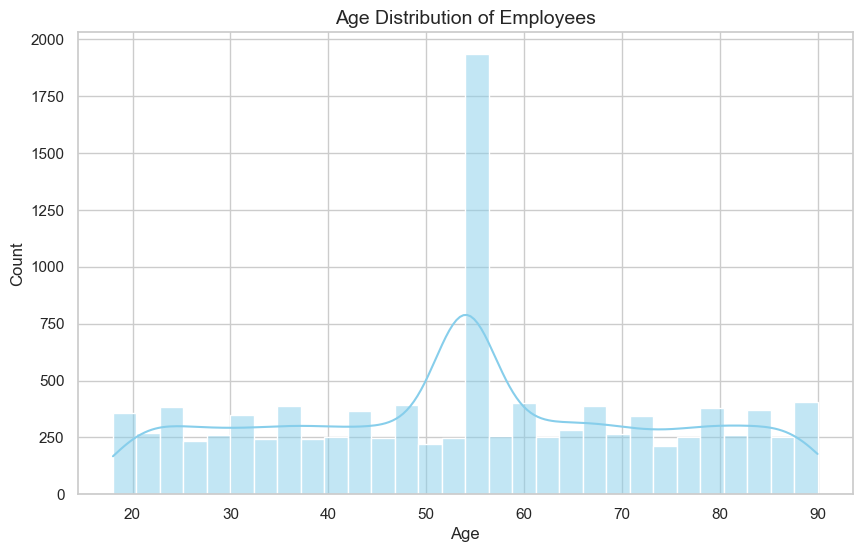

📊 Insight: Check for outliers (e.g., very high or very low ages). If the curve is skewed, it suggests either younger or older employees dominate.


In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Employees", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print("📊 Insight: Check for outliers (e.g., very high or very low ages). If the curve is skewed, "
      "it suggests either younger or older employees dominate.")

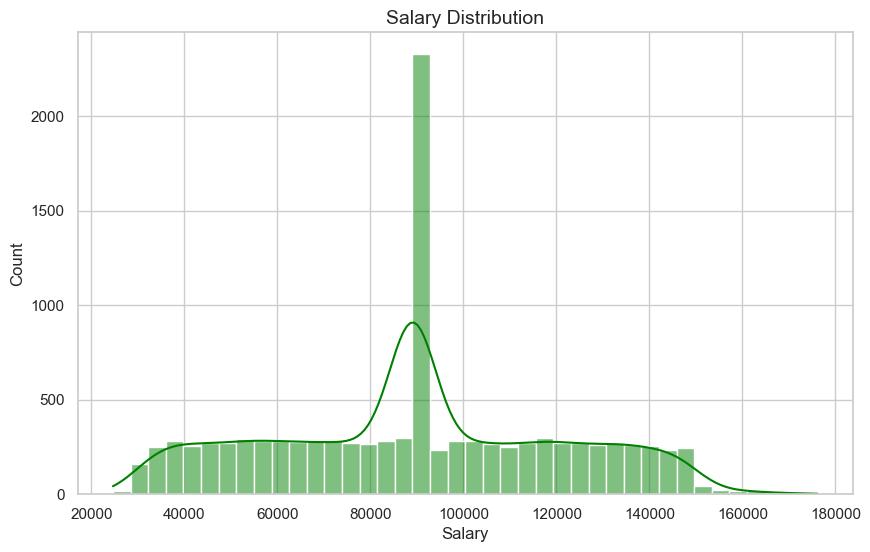

📊 Insight: Look for clustering (e.g., most employees earning within a specific range). Any extreme values may indicate data entry errors or top-level executives.


In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary_Cleaned'], bins=40, kde=True, color="green")
plt.title("Salary Distribution", fontsize=14)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

print("📊 Insight: Look for clustering (e.g., most employees earning within a specific range). "
      "Any extreme values may indicate data entry errors or top-level executives.")

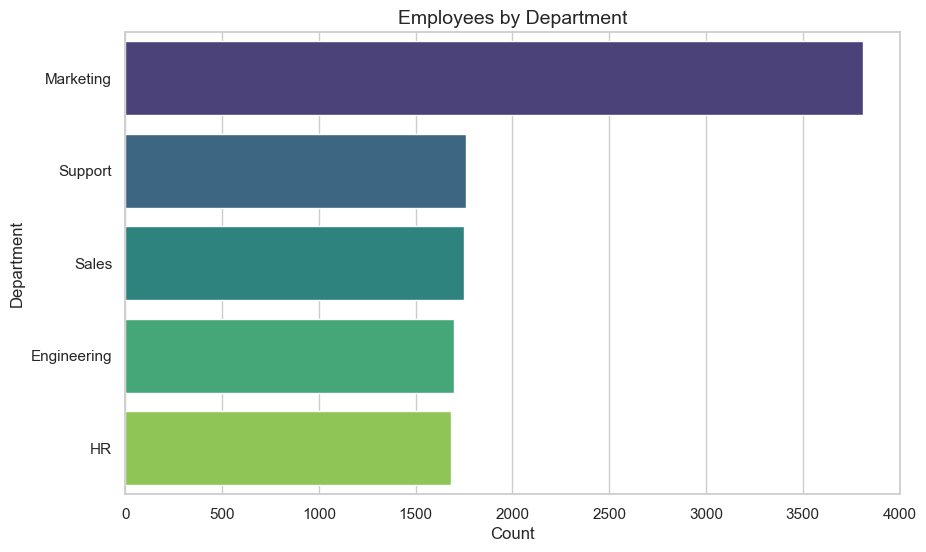

📊 Insight: Departments with high employee count may be core functions of the business. Smaller departments could be specialized teams.


In [36]:
plt.figure(figsize=(10,6))
sns.countplot(y='Cleaned_Department', data=df, order=df['Cleaned_Department'].value_counts().index, palette="viridis")
plt.title("Employees by Department", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()

print("📊 Insight: Departments with high employee count may be core functions of the business. "
      "Smaller departments could be specialized teams.")